In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa import stattools
import seaborn as sns
sns.set()
import japanize_matplotlib

df = pd.read_csv("data/use/count.csv", index_col=0)["count"]
df

date
2020/1/16      0
2020/1/17      0
2020/1/18      0
2020/1/19      0
2020/1/20      0
              ..
2021/10/17    40
2021/10/18    29
2021/10/19    36
2021/10/20    41
2021/10/21    36
Name: count, Length: 645, dtype: int64

# 1.8 移動平均乖離率

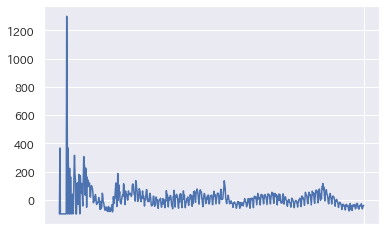

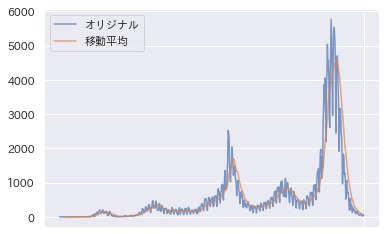

In [2]:
df_ma = df.rolling(14).mean()
df_ma_diff = ((df - df_ma)/df_ma*100).dropna()
# df_ma_diff = df_ma_diff.replace(np.inf, 1000).replace(-np.inf, -1000)
plt.plot(df_ma_diff)
plt.xticks("")

plt.figure()
plt.plot(df, label="オリジナル", alpha=0.7)
plt.plot(df_ma, label="移動平均", alpha=0.7)
plt.xticks("")
plt.legend()

# 自己相関・偏自己相関

''

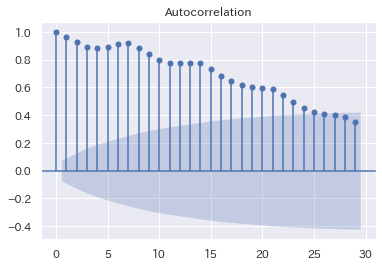

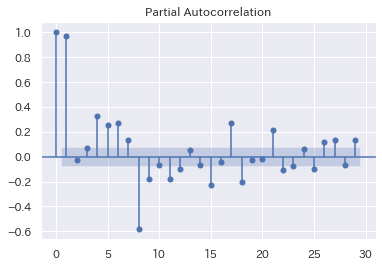

In [3]:
sm.graphics.tsa.plot_acf(df)
sm.graphics.tsa.plot_pacf(df)
""

# 2.1.1 最小二乗法

([<matplotlib.axis.XTick at 0x7fb8a0fec9d0>], [Text(0, 0, '')])

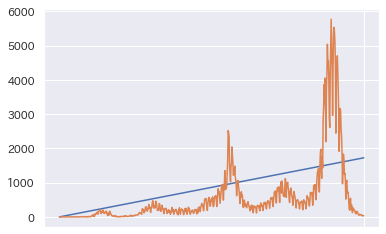

In [8]:
x = np.arange(len(df))
a = sum((df - df.mean())*(x - x.mean()))/sum((x - x.mean())**2)
y = a*x
plt.plot(x, y)
plt.plot(df)
plt.xticks("")

# 2.2 ARモデル

In [11]:

ctt = stattools.adfuller(df, regression="ctt")
ct = stattools.adfuller(df, regression="ct")
c = stattools.adfuller(df, regression="c")
nc = stattools.adfuller(df, regression="nc")
print("ctt:")
print(ctt)
print("ct:")
print(ct)
print("c:")
print(c)
print("nc:")
print(nc)

ctt:
(-2.783171408490828, 0.4075668794454355, 16, 283, {'1%': -4.412539681455529, '5%': -3.8534193681362523, '10%': -3.5662603419958545}, 3957.196368752523)
ct:
(-2.890384289039738, 0.16534485364337548, 16, 283, {'1%': -3.9911206267519432, '5%': -3.4261186073262926, '10%': -3.1362363911557405}, 3957.625632979218)
c:
(-2.5389641798509586, 0.10627939686463117, 16, 283, {'1%': -3.453670163592738, '5%': -2.8718077069772248, '10%': -2.5722411158835796}, 3957.6678990035166)
nc:
(-2.106866402543368, 0.033682340998484744, 16, 283, {'1%': -2.5736856404749715, '5%': -1.9419897547900222, '10%': -1.6159142523262657}, 3958.015911318535)
